# Prediciones de ABANDONO y FINALIZACION de Estudios

### LIBRERIAS del PROYECTO

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import operator

#Transformaciones:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


#Normalizar:
from sklearn.preprocessing import MinMaxScaler


#MODELOS
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV


from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency

#MEDICIONES:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report





### LEER ARCHIVO

In [2]:
ruta =  'C:/Users/juand/OneDrive/Escritorio/PORTFOLIO - DS 2024/KAGGLE/proyecto_01/data_estudiantes.csv'
data= pd.read_csv(ruta, delimiter=';')

### INICIO ANALISIS

#### Información del DATA SET

In [3]:
data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [4]:
data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

El DS no posee datos Nulos.

#### Modificar Nombre de Variables
* Mother's qualification
* Father's qualification 
* Mother's occupation 
* Father's occupation  

In [5]:
old_names = {
    "Mother's qualification": "mom_qualification",
    "Father's qualification": "dad_qualification",
    "Mother's occupation": "mom_occupation",
    "Father's occupation": "dad_occupation",
    "Daytime/evening attendance	": "daytime_evening",
    'Tuition fees up to date': 'matricula_al_dia',
    'GDP': 'pbi',
    'Curricular units 1st sem (grade)': 'curricular_primer_semestre',
    'Curricular units 2nd sem (grade)': 'curricular_segundo_semestre'

}

new_data = data.rename(columns=old_names)
new_data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'daytime_evening', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality', 'mom_qualification',
       'dad_qualification', 'mom_occupation', 'dad_occupation',
       'Admission grade', 'Displaced', 'Educational special needs', 'Debtor',
       'matricula_al_dia', 'Gender', 'Scholarship holder', 'Age at enrollment',
       'International', 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)', 'curricular_primer_semestre',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)', 'curricular_segundo_semestre',
       'Curricular units 2nd sem (without evaluations)', 'Unempl

In [6]:
new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.0,1.00,1.00,6.00
Application mode,4424.0,18.669078,17.484682,1.00,1.0,17.00,39.00,57.00
Application order,4424.0,1.727848,1.313793,0.00,1.0,1.00,2.00,9.00
Course,4424.0,8856.642631,2063.566416,33.00,9085.0,9238.00,9556.00,9991.00
daytime_evening,4424.0,0.890823,0.311897,0.00,1.0,1.00,1.00,1.00
Previous qualification,4424.0,4.577758,10.216592,1.00,1.0,1.00,1.00,43.00
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.0,133.10,140.00,190.00
Nacionality,4424.0,1.873192,6.914514,1.00,1.0,1.00,1.00,109.00
mom_qualification,4424.0,19.561935,15.603186,1.00,2.0,19.00,37.00,44.00
dad_qualification,4424.0,22.275316,15.343108,1.00,3.0,19.00,37.00,44.00


* Quitar Columna Tipo Objet:

In [7]:
new_data.drop(['curricular_primer_semestre','curricular_segundo_semestre' ], axis=1, inplace=True)
new_data

,Marital status,Application mode,Application order,Course,daytime_evening,Previous qualification,Previous qualification (grade),Nacionality,mom_qualification,dad_qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,pbi,Target
0,2,39,1,9003,1,3,110.0,1,3,19,...,0,6,12,14,12,0,16.2,0.3,-0.92,Graduate
1,1,39,1,9130,1,1,133.1,1,1,19,...,2,0,5,10,3,2,10.8,1.4,1.74,Dropout
2,2,39,1,9119,1,1,120.0,1,34,34,...,0,0,5,9,2,0,9.4,-0.8,-3.12,Dropout
3,1,1,1,9119,1,1,168.0,1,19,19,...,0,0,5,8,5,0,12.4,0.5,1.79,Graduate
4,1,43,1,9119,1,1,140.0,1,37,38,...,0,0,5,11,1,0,13.9,-0.3,0.79,Dropout
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,3,171,1,1,137.0,1,1,3,...,0,0,0,0,0,0,12.7,3.7,-1.70,Graduate
4420,1,39,1,9003,1,1,130.0,1,12,12,...,0,0,6,10,0,0,12.4,0.5,1.79,Dropout
4421,1,43,1,9991,0,1,161.0,1,37,37,...,0,0,5,5,0,0,7.6,2.6,0.32,Dropout
4422,1,1,2,9238,1,1,145.0,1,1,19,...,0,0,5,11,0,0,9.4,-0.8,-3.12,Enrolled


### FEATURE ENGINNERING:

##### FEATURE POLINOMICAS: 
* Librerias: from sklearn.preprocessing import PolynomialFeatures

Evaluar el impacto de las Variables economicas, considerando no solo el impacto individual de cada una de ellas, sino tambien considerar que en conjunto pueden tener un impacto superior.
* Las variables son:
    + Inflación
    + Desempleo

In [8]:
feature_economicas = new_data[['Unemployment rate', 'Inflation rate']]

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_feature_economicas = poly.fit_transform(feature_economicas)

feature_economicas_name = poly.get_feature_names_out(['Unemployment rate', 'Inflation rate'])
poly_feature_economicas_df = pd.DataFrame(poly_feature_economicas, columns=feature_economicas_name)



* COLUMNAS a QUITAR:

In [9]:
columnas_eliminar = ['Course', 'Application order','Nacionality','International',
                     'Curricular units 1st sem (credited)',
                     'Curricular units 1st sem (enrolled)', 
                     'Curricular units 1st sem (evaluations)', 
                     'Curricular units 1st sem (approved)',
                     'Curricular units 1st sem (without evaluations)',
                     'Curricular units 2nd sem (credited)',
                     'Curricular units 2nd sem (enrolled)',
                     'Curricular units 2nd sem (evaluations)',
                     'Curricular units 2nd sem (approved)',
                     'Curricular units 2nd sem (without evaluations)',
                     'Unemployment rate',
                     'Inflation rate'

                     ]

new_data.drop(columnas_eliminar, axis=1, inplace=True)

* Concatener Data Set (Depurado) + Nuevas feature

In [10]:
new_data = pd.concat([new_data, poly_feature_economicas_df], axis=1)

In [11]:
new_data

,Marital status,Application mode,daytime_evening,Previous qualification,Previous qualification (grade),mom_qualification,dad_qualification,mom_occupation,dad_occupation,Admission grade,...,Gender,Scholarship holder,Age at enrollment,pbi,Target,Unemployment rate,Inflation rate,Unemployment rate^2,Unemployment rate Inflation rate,Inflation rate^2
0,2,39,1,3,110.0,3,19,4,6,150.0,...,1,0,32,-0.92,Graduate,16.2,0.3,262.44,4.86,0.09
1,1,39,1,1,133.1,1,19,4,5,120.0,...,1,0,29,1.74,Dropout,10.8,1.4,116.64,15.12,1.96
2,2,39,1,1,120.0,34,34,0,0,140.0,...,1,0,33,-3.12,Dropout,9.4,-0.8,88.36,-7.52,0.64
3,1,1,1,1,168.0,19,19,4,4,171.2,...,1,1,18,1.79,Graduate,12.4,0.5,153.76,6.20,0.25
4,1,43,1,1,140.0,37,38,5,7,146.5,...,1,0,39,0.79,Dropout,13.9,-0.3,193.21,-4.17,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,1,1,137.0,1,3,5,2,133.9,...,1,0,19,-1.70,Graduate,12.7,3.7,161.29,46.99,13.69
4420,1,39,1,1,130.0,12,12,9,9,126.1,...,1,0,24,1.79,Dropout,12.4,0.5,153.76,6.20,0.25
4421,1,43,0,1,161.0,37,37,9,9,100.0,...,0,0,27,0.32,Dropout,7.6,2.6,57.76,19.76,6.76
4422,1,1,1,1,145.0,1,19,4,8,121.4,...,0,0,20,-3.12,Enrolled,9.4,-0.8,88.36,-7.52,0.64


* DICCIONARIO y ACCIONES:
    + Displaced: Si el estudiante fue desplazado o no de su lugar de origen.
    + Debtor: Si el estudiante posee deudas pendientes.
    + Scholarship holder: Si el estudiante posee Becas de Estudio.
    + Educational special needs: Indica si el estudiante tiene necesidades educativas especiales.


##### RELACIONES ENTRE VARIABLES: 

##### RELACION Entre los Niveles de Estudio de Padres e Hijo:

In [12]:
variables = ['Previous qualification', 'mom_qualification', 'dad_qualification']

In [13]:

def chi_square_test(new_data, x, y):
    contingency_table = pd.crosstab(new_data[x], new_data[y])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"Prueba Chi-cuadrado para {x} y {y}:")
    print(f"Estadístico Chi-cuadrado: {chi2}")
    print(f"Valor p: {p_value}")
    print("-----------------------------")

for var in variables:
    chi_square_test(new_data, var, 'Target')

Prueba Chi-cuadrado para Previous qualification y Target:
Estadístico Chi-cuadrado: 219.68070897587953
Valor p: 7.160305160682533e-30
-----------------------------
Prueba Chi-cuadrado para mom_qualification y Target:
Estadístico Chi-cuadrado: 217.9521305573784
Valor p: 5.823844464375137e-21
-----------------------------
Prueba Chi-cuadrado para dad_qualification y Target:
Estadístico Chi-cuadrado: 225.00078327362846
Valor p: 3.175006994347662e-19
-----------------------------


* Conclusion: 
    - Con los Valor-p, tan pequeños podemos concluir que la Hipotesis Nula (de que no existe relacion entre las variables) es rechazada, confirmando que si existe una relacion de interdependencia entre las variables, de "significancia", si bien no es una relación de "causalidad", estadisticamente podemos decir que estan relacionadas.
    - Los valores de Chi-Cuadrado, son altos, lo que tambien confirma la relacion entre las variables. Siendo la Variables "Previous qualification" la que posee la relacion más fuerte, con el Valor-p más pequeño. Por lo que realizar un analisis mas profundo en esta relación, puede ayudar a identificar si es que una calificación "mayor" del estudiantes tiene mayores probabilidades de graduarse.

### TRANFORMACIONES: 

#### Transformacion de Variable Dependiente (Target)
* Librerias: from sklearn.preprocessing import LabelEncoder

In [14]:
label_encoder = LabelEncoder()
new_data ['Target'] = label_encoder.fit_transform(new_data['Target'])
new_data['Target'].unique()

array([2, 0, 1])

#### SPLIT de DATOS:
* LIBRERIA: from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(new_data.drop('Target', axis=1), new_data['Target'], test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3539, 23)
X_test shape: (885, 23)
y_train shape: (3539,)
y_test shape: (885,)


* Reindexar las particiones

In [16]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

#### NORMALIZACION de Datos:
* LIBRERIA: from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler_train = MinMaxScaler()
scaler_test = MinMaxScaler()

X_train_normalized = scaler_train.fit_transform(X_train)
X_test_normalized = scaler_test.fit_transform(X_test)

### SELECCION del MODELO a ENTRENAR:

#### MODELO: RANDOM FOREST CLASSIFIER

* Crear el Modelo

In [18]:
model_random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

* Entrenar Modelo

In [19]:
model_random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

* Predicciones

In [20]:
y_pred = model_random_forest.predict(X_test)

##### METRICAS

* Cross Validation

In [21]:
cv_score = cross_val_score(model_random_forest, X_train, y_train, cv=5)
print(f'Metricas de Validación Cruzada: {cv_score}')

Metricas de Validación Cruzada: [0.64689266 0.57909605 0.61299435 0.60169492 0.6562942 ]


* Metricas Conjunto de Prueba

In [22]:
print('\nInforme de Clasificación:')
print(classification_report(y_test, y_pred))


Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.66      0.57      0.61       284
           1       0.37      0.14      0.20       149
           2       0.65      0.83      0.73       452

    accuracy                           0.63       885
   macro avg       0.56      0.51      0.51       885
weighted avg       0.60      0.63      0.60       885



* Conclusiones:
Al aplicar el Modelo de Random Forest y observar las diferentes metricas, vemos que la precisión del modelo es del 63% (accuracy), es decir que clasifica correctamente 63 de cada 100 instancias. Al analisar cada una de las **Clases** vemos que funciona mejor para la Clase "2", con un F1-Score superior al resto, se observa ademas un desbalanceo entre las clases, que podría ser parte del problema (support), coincidiendo las clases con mayor instancias, las que poseen un mejor F1-Score. 
    * El Modelo tiene un rendimiento **Moderado**, con mayores problemas en la Clase "0" y un desbalanceo que es posible este afectando el rendimiento.

* Matriz de Confusión

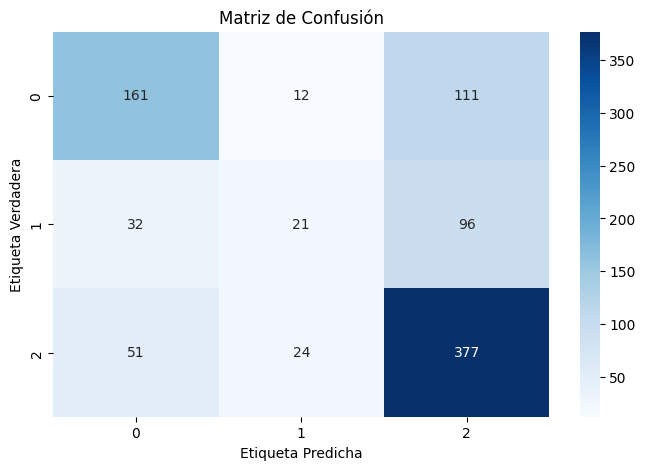

In [23]:
cm_rf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.show()

* En la Clase "0", el modelo acierta 161/284 casos.
* En la Clase "1", el modelo predice correctgamente 21/149 casos.
* En la Clase "2", acierta 377/452 casos.

Como se explico anteriormente el modelo en General tiene mejores resultados con la Clase "2", que con el resto de las clases. Ademas observamos una **confusión** entre Clase "0" y "2", debido a que en la clase "0" se identificaron 111 instancias como clase "2", mientras que a la inversa la clase "2" identifico 51 instancias como clase "0". Por el desbalanceo puede existir un **sesgo** hace la identificación de instancias hacia la Clase "2".-

* Importancia de Cada features

In [24]:
importances_rf = model_random_forest.feature_importances_
feature_names = X_train.columns
indices_rf = np.argsort(importances_rf)[::-1]


In [25]:
feature_importance_df = pd.DataFrame({'Feature': feature_names,'Importance': importances_rf})
print(feature_importance_df.to_string(index=False))


                         Feature  Importance
                  Marital status    0.011906
                Application mode    0.050523
                 daytime_evening    0.009547
          Previous qualification    0.015817
  Previous qualification (grade)    0.100492
               mom_qualification    0.055665
               dad_qualification    0.055079
                  mom_occupation    0.065187
                  dad_occupation    0.076857
                 Admission grade    0.118192
                       Displaced    0.021353
       Educational special needs    0.003029
                          Debtor    0.021942
                matricula_al_dia    0.074751
                          Gender    0.026832
              Scholarship holder    0.040041
               Age at enrollment    0.095195
                             pbi    0.030319
               Unemployment rate    0.027988
                  Inflation rate    0.023889
             Unemployment rate^2    0.026961
Unemployme

* Grafico Importancia

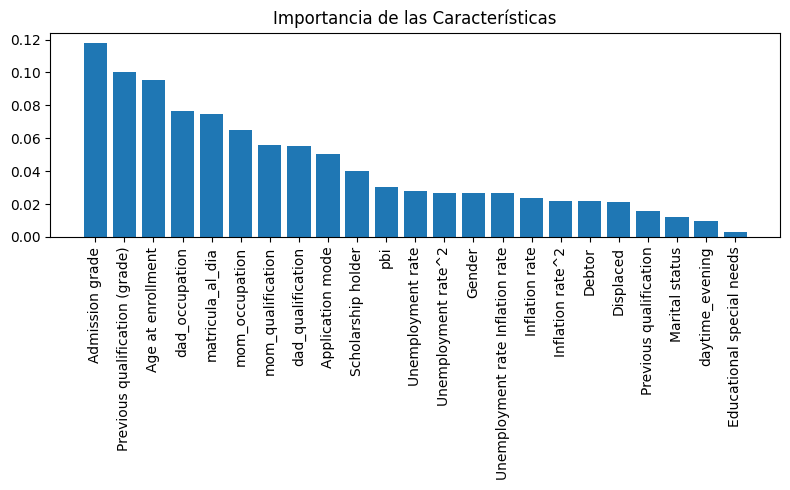

In [26]:
plt.figure(figsize=(8,5))
plt.title("Importancia de las Características")
plt.bar(range(X_train.shape[1]), importances_rf[indices_rf])
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices_rf], rotation=90)
plt.tight_layout()
plt.show()

#### MODELO: XGBoost

* Crear Modelo

In [27]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

* Entrenar el Modelo

In [28]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

* Realizar Predicciones

In [29]:
y_pred_xgb = xgb_model.predict(X_test)

##### METRICAS

* Metricas Cross Validation

In [30]:
cv_score_xgb = cross_val_score(xgb_model, X_train, y_train, cv=5)
print(f'Metricas de Validación Cruzada: {cv_score_xgb}')

Metricas de Validación Cruzada: [0.61723164 0.56214689 0.62853107 0.61158192 0.62942008]


* Metricas en Conjunto de Prueba

In [31]:
print('\nInforme de Clasificación')
print(classification_report(y_test, y_pred_xgb))


Informe de Clasificación
              precision    recall  f1-score   support

           0       0.63      0.57      0.60       284
           1       0.36      0.23      0.28       149
           2       0.66      0.78      0.71       452

    accuracy                           0.62       885
   macro avg       0.55      0.53      0.53       885
weighted avg       0.60      0.62      0.61       885



* Conclusión:
Podemos observar que el modelo posee una rendimiento global del 62%, es decir que predice correctamente 62/100 de las instancias analizadas.
    * En cuanto al F1-Score, podemos ver que el mejor rendimiento lo posee la Clase "2", para luego continuar con la clase "0" y por ultimo la clase "1", vemos coincidencia en que las clases con mayor acierto estan asociada a una mayor cantidad de instancias, por lo que podemos presuponer que existe un desbalanceo entre las 3 clases, lo que puede producir un sesgo en cuanto a las clases de mayores instancias, "2" y "0".

El Rendimiento del Modelo, es moderado en general, con problemas de desbalanceo con la consecuencia de baja precisión en las clases con menores instancias.

* Matriz de Confusión

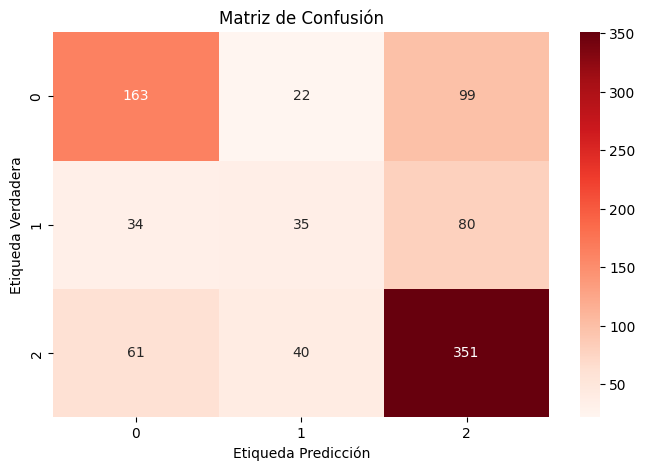

In [32]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8,5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Reds')
plt.title('Matriz de Confusión')
plt.ylabel('Etiqueda Verdadera')
plt.xlabel('Etiqueda Predicción')
plt.show()

Respecto lo que vemos en la Matriz de Confusión, observamos que la diagonal principal qu:
    * Para la Clase "0", existe un acierto de 163/184 instancias.
    * Para la Clase "1", el acierto disminuye a 35/149.
    * Para la Clase "2", el modelo posee el mejor rendimiento con 351/452.

En la Diagonal secundario, vemos que existe una clara confución entre las clases "0" y "2", ya que el modelo identifica que 99 intancias de la clase "0" como clase "2" y algo similar sucede con 61 instancias de la clase "2", que son identificadas como clase "0".

* Importancia de features

In [33]:
importances_xgb = xgb_model.feature_importances_
feature_names_xgb = X_train.columns
indices_xgb = np.argsort(importances_xgb)[::-1]

In [34]:
feature_importance_xgb_df = pd.DataFrame({'Feature': feature_names_xgb, 'Importance':importances_xgb})
print(feature_importance_xgb_df.to_string(index=False))


                         Feature  Importance
                  Marital status    0.019829
                Application mode    0.024827
                 daytime_evening    0.023855
          Previous qualification    0.025108
  Previous qualification (grade)    0.024034
               mom_qualification    0.022867
               dad_qualification    0.021845
                  mom_occupation    0.027836
                  dad_occupation    0.023371
                 Admission grade    0.024484
                       Displaced    0.021012
       Educational special needs    0.018671
                          Debtor    0.035401
                matricula_al_dia    0.372130
                          Gender    0.036051
              Scholarship holder    0.112723
               Age at enrollment    0.030118
                             pbi    0.027067
               Unemployment rate    0.023932
                  Inflation rate    0.023516
             Unemployment rate^2    0.000000
Unemployme

* Grafico de Barras: Importancia 

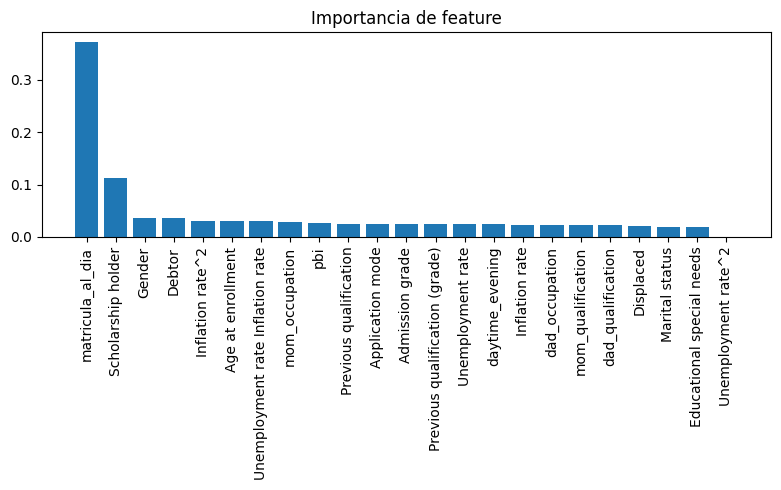

In [35]:
plt.figure(figsize=(8,5))
plt.title('Importancia de feature')
plt.bar(range(X_train.shape[1]), importances_xgb[indices_xgb])
plt.xticks(range(X_train.shape[1]), [feature_names_xgb[i] for i in indices_xgb], rotation=90)
plt.tight_layout()
plt.show()
